In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Leitura dos dados
df = pd.read_csv('../dados/Superstore.csv')

# Visualização inicial
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.9136
1,CA-2016-152156,11/8/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs,731.94,3,0.00,219.5820
2,CA-2016-138688,6/12/16,6/16/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.8714
3,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Hara,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.0310
4,US-2015-108966,10/11/15,10/18/15,Standard Class,SO-20335,Sean O'Hara,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,"Eldon Base for stackable storage shelf, platinum",22.37,2,0.20,2.5164


In [2]:
df.shape

(5, 20)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5 non-null      object 
 1   Order Date     5 non-null      object 
 2   Ship Date      5 non-null      object 
 3   Ship Mode      5 non-null      object 
 4   Customer ID    5 non-null      object 
 5   Customer Name  5 non-null      object 
 6   Segment        5 non-null      object 
 7   Country        5 non-null      object 
 8   City           5 non-null      object 
 9   State          5 non-null      object 
 10  Postal Code    5 non-null      int64  
 11  Region         5 non-null      object 
 12  Product ID     5 non-null      object 
 13  Category       5 non-null      object 
 14  Sub-Category   5 non-null      object 
 15  Product Name   5 non-null      object 
 16  Sales          5 non-null      float64
 17  Quantity       5 non-null      int64  
 18  Discount      

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,5.000000,5.000000,5.00000,5.000000,5.000000
mean,48299.600000,397.694000,2.80000,0.130000,-22.429520
std,23771.741297,427.560006,1.30384,0.198746,220.354194
min,33311.000000,14.620000,2.00000,0.000000,-383.031000
25%,33311.000000,22.370000,2.00000,0.000000,2.516400
50%,42420.000000,261.960000,2.00000,0.000000,6.871400
75%,42420.000000,731.940000,3.00000,0.200000,41.913600
max,90036.000000,957.580000,5.00000,0.450000,219.582000


In [5]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df['Segment'].value_counts()

Segment
Consumer     4
Corporate    1
Name: count, dtype: int64

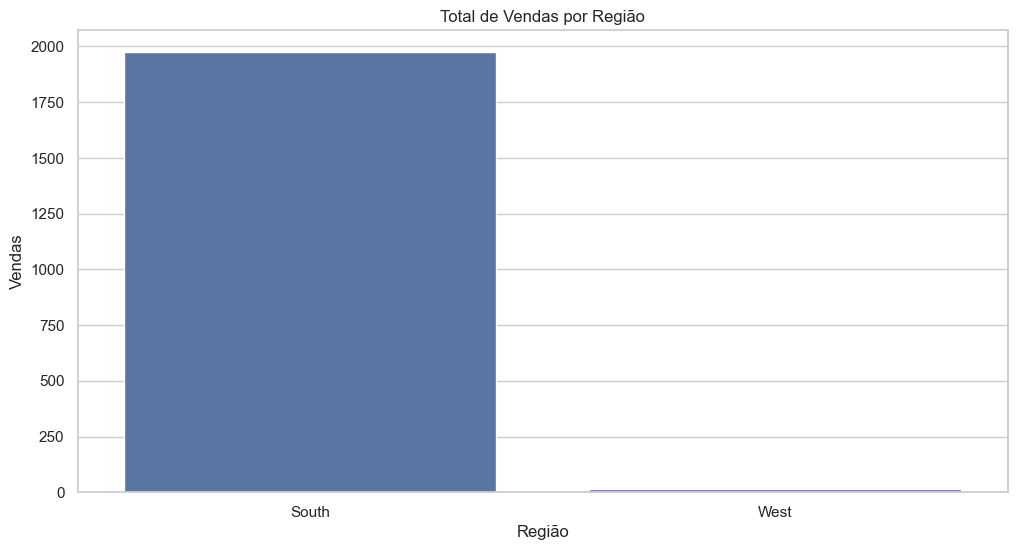

In [8]:
df_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

sns.barplot(x=df_region.index, y=df_region.values)
plt.title('Total de Vendas por Região')
plt.ylabel('Vendas')
plt.xlabel('Região')
plt.savefig('../imagens/vendas_por_regiao.png', bbox_inches='tight')
plt.show()


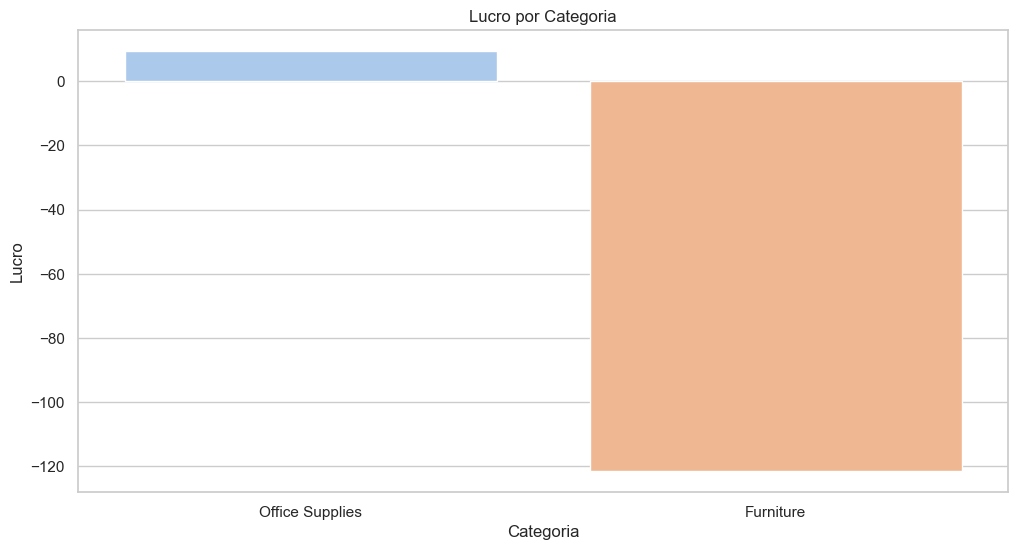

In [10]:
sns.barplot(x=df_category.index, y=df_category.values, hue=df_category.index, palette='pastel', legend=False)
plt.title('Lucro por Categoria')
plt.ylabel('Lucro')
plt.xlabel('Categoria')
plt.savefig('../imagens/lucro_por_categoria.png', bbox_inches='tight')
plt.show()

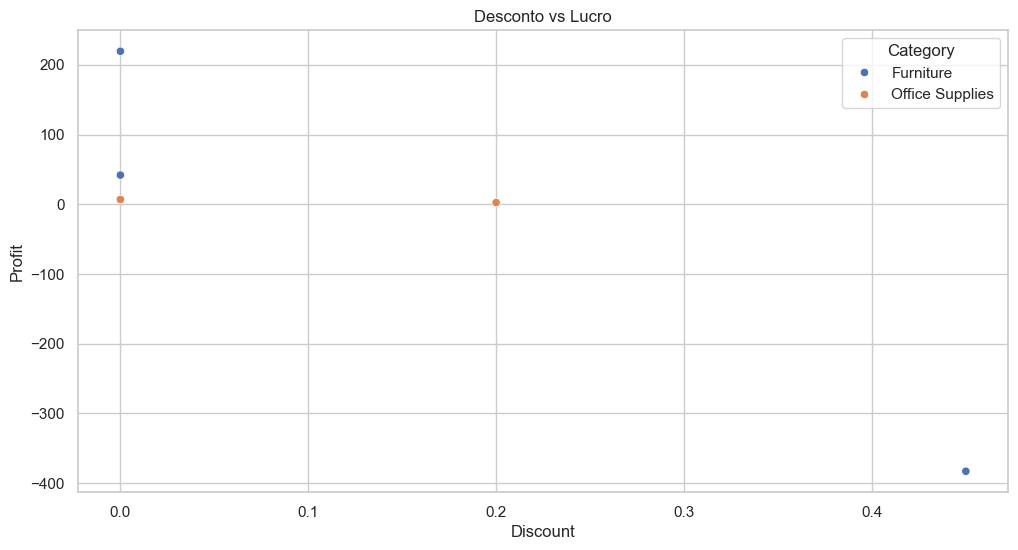

In [11]:
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Desconto vs Lucro')
plt.savefig('../imagens/desconto_vs_lucro.png', bbox_inches='tight')
plt.show()

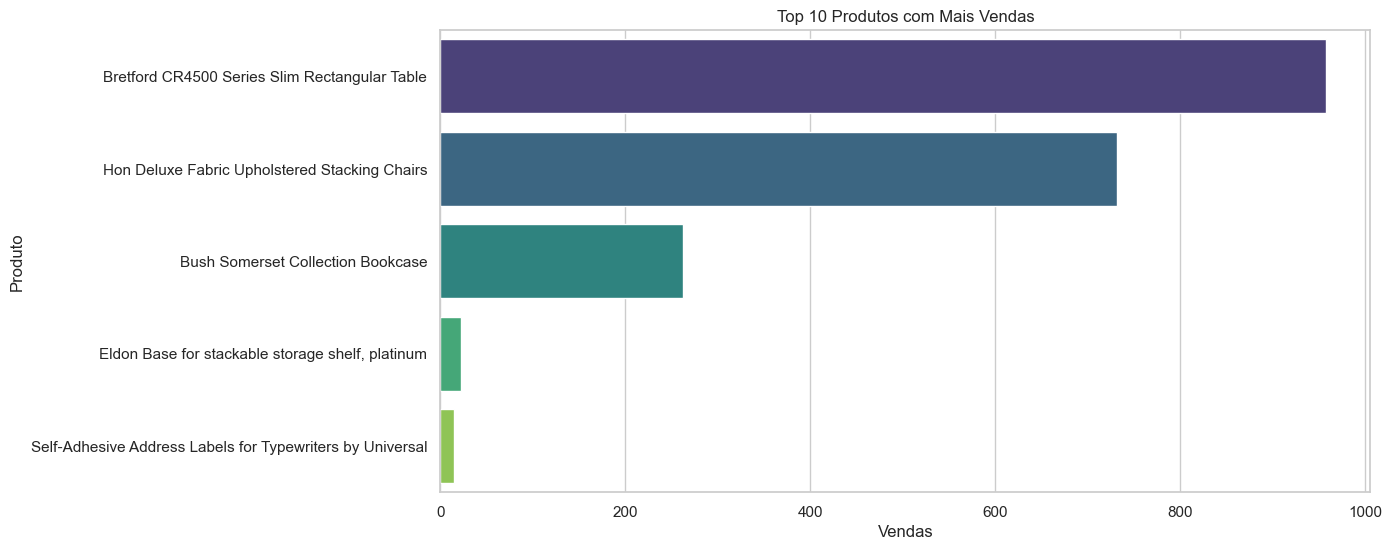

In [13]:
sns.barplot(y=top_produtos.index, x=top_produtos.values, hue=top_produtos.index, palette='viridis', legend=False)
plt.title('Top 10 Produtos com Mais Vendas')
plt.xlabel('Vendas')
plt.ylabel('Produto')
plt.savefig('../imagens/top_10_produtos_mais_vendidos.png', bbox_inches='tight')
plt.show()
